In [1]:
# セクター別リターン 練習用
# 1,過去6ヶ月および過去3ヶ月のセクター別リターン
# 2,セクター別の月次リターン
# https://github.com/J-Quants/jquants-api-client-python/blob/main/examples/20220825-002-sector.ipynb

In [2]:
import os
from datetime import datetime

import japanize_matplotlib
import jquantsapi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
# pandas の表示制限を調整します
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 2000)
     


In [3]:
df_schedule = pd.read_csv(r"C:\Users\xxp2p\OneDrive\デスクトップ\ipo_csv格納庫\df_schedule_0120.csv", encoding='utf-8_sig')
df_assessments = pd.read_csv(r"C:\Users\xxp2p\OneDrive\デスクトップ\ipo_csv格納庫\df_assessments_0131.csv", encoding='utf-8_sig')
df_shareholders = pd.read_csv(r"C:\Users\xxp2p\OneDrive\デスクトップ\ipo_csv格納庫\df_shareholders_0120.csv", encoding='utf-8_sig')
df_underwriters = pd.read_csv(r"C:\Users\xxp2p\OneDrive\デスクトップ\ipo_csv格納庫\df_underwriters_0120.csv", encoding='utf-8_sig')

In [5]:
# リフレッシュトークンの更新　メールアドレスとパスワード漏洩注意
# https://ku-ai-trade.com/j-quants-api/

# data={"mailaddress":"登録したメアド", "password":"登録したpass"}
r_post = requests.post("https://api.jpx-jquants.com/v1/token/auth_user", data=json.dumps(data))
r_post.json()
# トークン取得
refresh_token = r_post.json()['refreshToken']
# J-Quants APIクライアントを初期化します
jqapi = jquantsapi.Client(refresh_token=refresh_token)
# 銘柄情報を取得します
df_list = jqapi.get_list()

In [6]:
# 株価データ取得、1銘柄のみ
# 株価情報APIは、codeを指定していれば、from, toでのデータ取得も可能。
df_mothers_etf_price = jqapi.get_prices_daily_quotes(code=25160,
    from_yyyymmdd=20160801,
    to_yyyymmdd=20220901)
# oc_change,cc_change作成
df_mothers_etf_price["oc_change"] = df_mothers_etf_price["AdjustmentClose"] / df_mothers_etf_price["AdjustmentOpen"] - 1
df_mothers_etf_price["cc_change"] = df_mothers_etf_price["AdjustmentClose"] / df_mothers_etf_price["AdjustmentClose"].shift(1) - 1
df_mothers_etf_price["oc_change_downflag"] = [1 if x < 0 else 0 for x in df_mothers_etf_price["oc_change"]]
df_mothers_etf_price['oc_change'] = df_mothers_etf_price['oc_change'].fillna(0)
df_mothers_etf_price


,Code,Date,Open,High,Low,Close,Volume,TurnoverValue,AdjustmentFactor,AdjustmentOpen,AdjustmentHigh,AdjustmentLow,AdjustmentClose,AdjustmentVolume,oc_change,cc_change,oc_change_downflag
0,25160,2018-02-01,1022.0,1024.0,1006.0,1022.0,308400.0,3.137641e+08,1.0,1022.0,1024.0,1006.0,1022.0,308400.0,0.000000,NaN,0
1,25160,2018-02-02,1024.0,1024.0,998.0,1011.0,219710.0,2.217759e+08,1.0,1024.0,1024.0,998.0,1011.0,219710.0,-0.012695,-0.010763,1
2,25160,2018-02-05,985.0,989.0,971.0,981.0,178980.0,1.755376e+08,1.0,985.0,989.0,971.0,981.0,178980.0,-0.004061,-0.029674,1
3,25160,2018-02-06,906.0,923.0,856.0,897.0,407770.0,3.625499e+08,1.0,906.0,923.0,856.0,897.0,407770.0,-0.009934,-0.085627,1
4,25160,2018-02-07,957.0,957.0,884.0,884.0,241670.0,2.249213e+08,1.0,957.0,957.0,884.0,884.0,241670.0,-0.076280,-0.014493,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,25160,2022-08-26,577.9,579.9,571.7,573.6,1109900.0,6.377145e+08,1.0,577.9,579.9,571.7,573.6,1109900.0,-0.007441,-0.000871,1
1114,25160,2022-08-29,547.8,561.3,547.8,559.0,2801340.0,1.557749e+09,1.0,547.8,561.3,547.8,559.0,2801340.0,0.020445,-0.025453,0
1115,25160,2022-08-30,562.0,568.8,561.9,567.0,1327710.0,7.505755e+08,1.0,562.0,568.8,561.9,567.0,1327710.0,0.008897,0.014311,0
1116,25160,2022-08-31,565.8,571.0,564.0,568.1,1167740.0,6.626058e+08,1.0,565.8,571.0,564.0,568.1,1167740.0,0.004065,0.001940,0


In [7]:
# 欠損値の確認
df_mothers_etf_price[df_mothers_etf_price.isnull().any(axis=1)]

,Code,Date,Open,High,Low,Close,Volume,TurnoverValue,AdjustmentFactor,AdjustmentOpen,AdjustmentHigh,AdjustmentLow,AdjustmentClose,AdjustmentVolume,oc_change,cc_change,oc_change_downflag
0,25160,2018-02-01,1022.0,1024.0,1006.0,1022.0,308400.0,313764140.0,1.0,1022.0,1024.0,1006.0,1022.0,308400.0,0.000000,NaN,0
647,25160,2020-10-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0
648,25160,2020-10-02,955.0,962.0,931.0,936.0,591600.0,560441530.0,1.0,955.0,962.0,931.0,936.0,591600.0,-0.019895,NaN,1


ここで検証コードつくってみる

In [ ]:
# ipo検証用のdf作成[1]

# 期末発行済株式数カラム作成用コード
df_fin_first_list = pd.DataFrame()
for i in df_assessments["code"].values:
# for i in [3277]:実験用
    df_fin_first = jqapi.get_fins_statements(code=i)
    df_fin_first["期末発行済株式数"] = df_fin_first["NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock"]
    df_fin_first["期末発行済株式数"] = pd.to_numeric(df_fin_first["期末発行済株式数"], errors='raise', downcast=None)
    df_fin_first["期末発行済株式数"] = df_fin_first["期末発行済株式数"].fillna(method='bfill')
    df_fin_first_list = pd.concat([df_fin_first_list,df_fin_first.iloc[:1,:]], axis=0)
# df_fin_first_list["期末発行済株式数"]

In [20]:
# 時短用 read_csv
# df_fin_first_list = pd.read_csv(r"C:\Users\xxp2p\OneDrive\デスクトップ\df_fin_first_list.csv", encoding='utf-8_sig')
# df_fin_first_list["LocalCode"] = df_fin_first_list["LocalCode"].astype(str)


# 時短用　確認用to_csv
# df_fin_first_list.to_csv(r"C:\Users\xxp2p\OneDrive\デスクトップ\df_fin_first_list.csv", encoding='utf-8_sig',index=False)

In [9]:
# ipo検証用のdf作成[2]

# indexのリセット 
df_fin_first_list = df_fin_first_list.reset_index(drop=True)
# mergeのためにcode列を作成し文字列型で最後の０を抜く
df_fin_first_list["code"] = df_fin_first_list["LocalCode"]
# 最後の一文字を消す
df_fin_first_list["code"] = df_fin_first_list["code"].str[:-1]
# 数値型に変更
df_fin_first_list["code"] = df_fin_first_list["code"].astype(int)
# 必要なカラムのみ残す
df_fin_first_list["期末発行済株式数_開示日"] = df_fin_first_list["DisclosedDate"]
df_fin_first_list = df_fin_first_list[[
    "code",
    "期末発行済株式数",
    "期末発行済株式数_開示日"
]]
# merge
df_ipo_inspection = df_assessments[[
    "code",
    "初値（円）",
    "想定価格（円）",
    "上場市場"
    ]]

df_ipo_inspection = pd.merge(df_ipo_inspection,df_fin_first_list, on="code", how="inner")
df_schedule_ipo = df_schedule[[
    "code",
    "上場日",
    "当選株数合計（株）"
]]

df_ipo_inspection = pd.merge(df_ipo_inspection,df_schedule_ipo, on="code", how="inner")


# 時価総額カラム作成
df_ipo_inspection["時価総額_想定価格計算"] = df_ipo_inspection["期末発行済株式数"] * df_ipo_inspection["想定価格（円）"]
df_ipo_inspection["時価総額_初値計算"] = df_ipo_inspection["期末発行済株式数"] * df_ipo_inspection["初値（円）"]

# 公募＋売出の総額
df_ipo_inspection["公募売出総額_想定価格計算"] = df_ipo_inspection["当選株数合計（株）"] * df_ipo_inspection["想定価格（円）"]
df_ipo_inspection["公募売出総額_初値計算"] = df_ipo_inspection["当選株数合計（株）"] * df_ipo_inspection["初値（円）"]


In [10]:
# 日付でソートするための日付列をdatetime型に変換
df_ipo_inspection["上場日"] = pd.to_datetime(df_ipo_inspection["上場日"])
df_ipo_inspection = df_ipo_inspection.loc[df_ipo_inspection["上場市場"] == "マザーズ",:]
# マザーズetf上場後の2018-02-01以降のデータのみを抽出
df_ipo_inspection = df_ipo_inspection[df_ipo_inspection['上場日'] >= "2018-02-01"]


In [11]:
# 日付列でソート
df_ipo_inspection.sort_values(by='上場日', ascending=True, inplace=True)

In [12]:
# 時価総額_初値計算でソート 500億以上
df_ipo_inspection.sort_values(by='時価総額_初値計算', ascending=True, inplace=True)
df_ipo_inspection = df_ipo_inspection[df_ipo_inspection['時価総額_初値計算'] >= 5.00e+10]
df_ipo_inspection = df_ipo_inspection.reset_index(drop=True)

In [13]:
# 時価総額で抽出したipo銘柄の上場後の値動き
# ipo_price_df_list　対象銘柄上場日の5日間の値動きをdfでリストに保存（5日間）時価総額＿初値500億以上
# df_mothers_etf_price_df_list　前後5日間ずつをリストに保存
# マザーズetfの上場した2018-02-01以後のみ検証

# ipoの株価保存用リスト
df_ipo_price_list = []

df_mothers_etf_price_list = []
mothers_etf_oc_change_list =[]
mothers_etf_oc_change_downflag_list = []
# cc_change用 
# df_mothers_etf_cc_change_list = []
# mothers_etf_cc_change_list =[]
for i in range(len(df_ipo_inspection)):
    ipo_code = df_ipo_inspection["code"][i]
    date = df_ipo_inspection["上場日"][i]
    # timestampに〇日足す（Timedelt）
    end_date = date + pd.Timedelta(days=20)
    start_date = date.strftime("%Y%m%d")
    end_date = end_date.strftime("%Y%m%d")
    # get_prices_daily_quotesのために数字に変更
    start_date = pd.to_numeric(start_date)
    end_date = pd.to_numeric(end_date)
    price = jqapi.get_prices_daily_quotes(code=ipo_code,
        from_yyyymmdd=start_date,
        to_yyyymmdd=end_date)
    # 上場日から5日間を抽出
    df_ipo_price_list.append(price[0:5])

    # マザーズetfの値動き保存　前後の日数設定
    target_date = date
    start_index = df_mothers_etf_price[df_mothers_etf_price['Date'] == target_date].index[0] - 5
    end_index = df_mothers_etf_price[df_mothers_etf_price['Date'] == target_date].index[0] + 5
    # リストに追加
    df_mothers_etf_price_list.append(df_mothers_etf_price.iloc[start_index:end_index])
    mothers_etf_oc_change_list.append(df_mothers_etf_price.iloc[start_index:end_index].oc_change.values)
    mothers_etf_oc_change_downflag_list.append(df_mothers_etf_price.iloc[start_index:end_index].oc_change_downflag.values)
    # cc_change用 
    # df_mothers_etf_cc_change_list.append(df_mothers_etf_price.iloc[start_index:end_index].cc_change)
    # mothers_etf_cc_change_list.append(df_mothers_etf_price.iloc[start_index:end_index].cc_change.values)



下落確率検証

In [14]:
# マザーズetf　全期間　ocの下落率
df_mothers_etf_price.oc_change_downflag.mean()

0.48300536672629696

In [15]:
# マザーズipo上場前後etfのocの下落率（－5日～5日目まで）
np.mean(mothers_etf_oc_change_downflag_list,axis=0)

array([0.5       , 0.72727273, 0.5       , 0.40909091, 0.68181818,
       0.54545455, 0.31818182, 0.36363636, 0.68181818, 0.63636364])

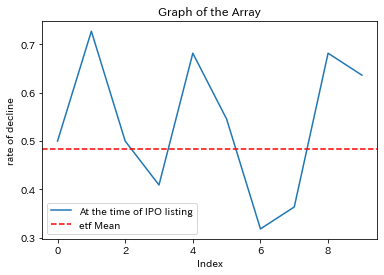

In [16]:
# 可視化
mean = df_mothers_etf_price.oc_change_downflag.mean()
x = [i for i in range(len(np.mean(mothers_etf_oc_change_downflag_list,axis=0)))]
y = np.mean(mothers_etf_oc_change_downflag_list,axis=0)
plt.plot(x, y, label="At the time of IPO listing")
plt.axhline(mean,color='red', linestyle='--', label="etf Mean")
plt.xlabel("Index")
plt.ylabel("rate of decline")
plt.title("Graph of the Array")
plt.legend()
plt.show()

In [17]:
# マザーズipo　上場前　ocの下落率（-5日～-1日目まで）
np.mean(np.mean(mothers_etf_oc_change_downflag_list,axis=0)[0:5])

0.5636363636363636

In [18]:
# マザーズipo　上場後　ocの下落率（1日～5日目まで）
np.mean(np.mean(mothers_etf_oc_change_downflag_list,axis=0)[5:10])


0.509090909090909

In [19]:
# マザーズipo　上場前後　ocの下落率（全日の平均）
np.mean(np.mean(mothers_etf_oc_change_downflag_list,axis=0))

0.5363636363636364

条件（期間2018-02-01～、ipoマザーズ上場、時価総額（初値計算）500億以上）

etf全期間の下落率約48%のところ

・上場前5日間平均約56%

・上場後5日間平均約51%

・上場前後の10日間平均54%

以上から下落率は多少は高いがあまり変わらない